<a href="https://colab.research.google.com/github/hansong798/bulkRNAseq-analysis-PNU-workshop/blob/main/bulkRNA_seq_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install required packages**
약 10분 소요 예상

In [ ]:
install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
BiocManager::install("biomaRt")   # ~3 min

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'biomaRt'

also installing the dependencies ‘XVector’, ‘GenomeInfoDb’, ‘Biostrings’, ‘IRanges’, ‘KEGGREST’, ‘AnnotationDbi’




In [ ]:
BiocManager::install("DESeq2") # ~3 min

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'DESeq2'

also installing the dependencies ‘abind’, ‘SparseArray’, ‘S4Arrays’, ‘DelayedArray’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocParallel’




In [ ]:
BiocManager::install("org.Hs.eg.db") # ~1 min

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'org.Hs.eg.db'



In [ ]:
library(ggplot2)
library(dplyr)
library(data.table)
library(tidyverse)
library(BiocManager)
library(biomaRt)
library(DESeq2)
library(org.Hs.eg.db)

Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

    select






# **Download GSE dataset**
좌측 폴더 모양 클릭 후 다운로드 받은 GSE 파일을 업로드

In [ ]:
getwd()

[1] "/content"

In [ ]:
#--------- 1. read data # 데이터 구글드라이브에 올려야함
raw_count <- read.table('/content/GSE152418_p20047_Study1_RawCounts.txt', header = T, row.names = 1)

In [ ]:
raw_count   # Ensembl Gene ID
dim(raw_count)
class(raw_count)

,S145_nCOV001_C,S147_nCoV001EUHM.Draw.1,S149_nCoV002EUHM.Draw.2,S150_nCoV003EUHM.Draw.1,S151_nCoV004EUHM.Draw.1,S152_nCoV006EUHM.Draw.1,S153_nCoV007EUHM.Draw.1,S154_nCoV0010EUHM.Draw.1,S155_nCOV021EUHM,S156_nCOV024EUHM.Draw.1,⋯,S068_272,S069_273,S070_279,S071_280,S181_255,S182_SHXA10,S183_263,S184_SHXA18,S185_266,S186_SHXA14
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972,0,0,0,0,0,0,0,0,2,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000227232,1,0,3,16,1,2,18,6,20,0,⋯,1,1,1,2,3,4,1,0,0,7
ENSG00000278267,3,1,2,0,3,0,0,1,3,2,⋯,2,7,2,6,3,2,6,12,5,3
ENSG00000243485,2,0,0,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
ENSG00000284332,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000268020,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000240361,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000186092,0,0,0,0,0,0,0,1,1,0,⋯,0,3,0,0,0,0,0,0,0,0


[1] 60683    34

[1] "data.frame"

In [ ]:
raw_count_matrix <- as.matrix.data.frame(raw_count)
str(raw_count_matrix)

 int [1:60683, 1:34] 0 1 3 2 0 0 0 1 0 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:60683] "ENSG00000223972" "ENSG00000227232" "ENSG00000278267" "ENSG00000243485" ...
  ..$ : chr [1:34] "S145_nCOV001_C" "S147_nCoV001EUHM.Draw.1" "S149_nCoV002EUHM.Draw.2" "S150_nCoV003EUHM.Draw.1" ...


# **[1] Preprocessing**
input data를 만들기 위한 전처리 과정

In [ ]:
colnames(raw_count)

[1] "S145_nCOV001_C"           "S147_nCoV001EUHM.Draw.1" 
 [3] "S149_nCoV002EUHM.Draw.2"  "S150_nCoV003EUHM.Draw.1" 
 [5] "S151_nCoV004EUHM.Draw.1"  "S152_nCoV006EUHM.Draw.1" 
 [7] "S153_nCoV007EUHM.Draw.1"  "S154_nCoV0010EUHM.Draw.1"
 [9] "S155_nCOV021EUHM"         "S156_nCOV024EUHM.Draw.1" 
[11] "S157_nCOV0029EUHM"        "S175_nCoV024EUHM.Draw.2" 
[13] "S176_nCoV025EUHM.Draw.1"  "S177_nCoV025EUHM.Draw.2" 
[15] "S178_nCoV028EUHM.Draw.1"  "S179_nCoV033EUHM.Draw.1" 
[17] "S180_nCoV034EUHM.Draw.1"  "S061_257"                
[19] "S062_258"                 "S063_259"                
[21] "S064_260"                 "S065_261"                
[23] "S066_265"                 "S067_270"                
[25] "S068_272"                 "S069_273"                
[27] "S070_279"                 "S071_280"                
[29] "S181_255"                 "S182_SHXA10"             
[31] "S183_263"                 "S184_SHXA18"             
[33] "S185_266"                 "S186_SHXA14"

In [ ]:
col <- colnames(raw_count)
group <- col
group[grepl('COV',group)|grepl('CoV',group)] <- 'COVID19'
group[!grepl('COV',group) & !grepl('CoV',group)] <- 'Healthy'

In [ ]:
group <- factor(group, levels = c('Healthy','COVID19'))  # 첫번째가 reference level이 됨

In [ ]:
group
str(group)
table(group)

[1] COVID19 COVID19 COVID19 COVID19 COVID19 COVID19 COVID19 COVID19 COVID19
[10] COVID19 COVID19 COVID19 COVID19 COVID19 COVID19 COVID19 COVID19 Healthy
[19] Healthy Healthy Healthy Healthy Healthy Healthy Healthy Healthy Healthy
[28] Healthy Healthy Healthy Healthy Healthy Healthy Healthy
Levels: Healthy COVID19

 Factor w/ 2 levels "Healthy","COVID19": 2 2 2 2 2 2 2 2 2 2 ...


group
Healthy COVID19 
     17      17 

In [ ]:
colData = data.frame(sample = col, group = group)

In [ ]:
dds <- DESeqDataSetFromMatrix(raw_count_matrix, colData = colData, design = ~group)

In [ ]:
dds

class: DESeqDataSet 
dim: 60683 34 
metadata(1): version
assays(1): counts
rownames(60683): ENSG00000223972 ENSG00000227232 ... ENSG00000277475
  ENSG00000268674
rowData names(0):
colnames(34): S145_nCOV001_C S147_nCoV001EUHM.Draw.1 ... S185_266
  S186_SHXA14
colData names(2): sample group

#**[2] Filtering**#
너무 낮은 발현을 보이는 유전자 제거


In [ ]:
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]
dds

class: DESeqDataSet 
dim: 37107 34 
metadata(1): version
assays(1): counts
rownames(37107): ENSG00000227232 ENSG00000278267 ... ENSG00000275405
  ENSG00000277475
rowData names(0):
colnames(34): S145_nCOV001_C S147_nCoV001EUHM.Draw.1 ... S185_266
  S186_SHXA14
colData names(2): sample group

# **[3] Run DESeq**

In [ ]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 149 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [ ]:
res <- results(dds)
res
#baseMean: 모든 샘플의 normalized average
#log2FoldChange: case vs control log2FoldChange (+)
#lfeSE: log2FC standard error
#stat: Wald test statistics
#pvalue
#padj: corrected pvalue (Benjamini-Hochberg (BH))

log2 fold change (MLE): group COVID19 vs Healthy 
Wald test p-value: group COVID19 vs Healthy 
DataFrame with 37107 rows and 6 columns
                   baseMean log2FoldChange     lfcSE      stat      pvalue
                  <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000227232    4.903704       2.342651  0.620281  3.776757 0.000158884
ENSG00000278267    3.363780      -1.089085  0.385383 -2.825983 0.004713577
ENSG00000233750    0.591105       0.306508  0.767120  0.399556 0.689483305
ENSG00000268903   11.655757       0.762845  0.261644  2.915585 0.003550219
ENSG00000269981    8.992562       0.529600  0.368955  1.435407 0.151171063
...                     ...            ...       ...       ...         ...
ENSG00000277856  586.998684      4.4542520  0.620738  7.175737 7.19186e-13
ENSG00000275063 1504.770646      3.5975685  0.537403  6.694356 2.16623e-11
ENSG00000271254   56.317794     -0.0804585  0.186943 -0.430390 6.66912e-01
ENSG00000275405   11.395651     -0.04969

In [ ]:
summary(res)


out of 37107 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 8195, 22%
LFC < 0 (down)     : 3625, 9.8%
outliers [1]       : 0, 0%
low counts [2]     : 3598, 9.7%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
res_filt <- results(dds, alpha = 0.01, lfcThreshold = 0.5)
summary(res_filt)


out of 37107 with nonzero total read count
adjusted p-value < 0.01
LFC > 0.50 (up)    : 979, 2.6%
LFC < -0.50 (down) : 32, 0.086%
outliers [1]       : 0, 0%
low counts [2]     : 7914, 21%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
upregulated <- subset(res_filt, padj < 0.01 & log2FoldChange > 2)
downregulated <- subset(res_filt, padj < 0.01 & log2FoldChange < -2)

In [ ]:
upregulated
downregulated

log2 fold change (MLE): group COVID19 vs Healthy 
Wald test p-value: group COVID19 vs Healthy 
DataFrame with 732 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat      pvalue
                 <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000237973  209.13417        2.61822  0.581976   4.49885 1.36516e-04
ENSG00000142609    2.82141        2.71267  0.616928   4.39706 1.67606e-04
ENSG00000078900   27.63962        2.14167  0.291138   7.35620 8.56190e-09
ENSG00000235169   15.53300        2.71669  0.431366   6.29787 1.38279e-07
ENSG00000234546    1.94495        3.02279  0.671623   4.50072 8.63155e-05
...                    ...            ...       ...       ...         ...
ENSG00000184809    1.36353        3.23566  0.748914   4.32046 1.29989e-04
ENSG00000171587    2.66595        2.53939  0.597151   4.25250 3.18862e-04
ENSG00000277836   53.50212        3.07759  0.580573   5.30095 4.50382e-06
ENSG00000277856  586.99868        4.45425  0.620738  

log2 fold change (MLE): group COVID19 vs Healthy 
Wald test p-value: group COVID19 vs Healthy 
DataFrame with 8 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000163485  14.50618       -2.48691  0.464006  -5.35965 9.25793e-06
ENSG00000144290  61.09591       -2.58054  0.398538  -6.47502 8.92519e-08
ENSG00000226321  49.86269       -2.01022  0.401409  -5.00791 8.41787e-05
ENSG00000204388 148.67583       -2.84501  0.521641  -5.45396 3.47130e-06
ENSG00000287535  11.95918       -4.42146  1.027416  -4.30348 6.84255e-05
ENSG00000236783   2.70274       -2.92883  0.552117  -5.30473 5.43476e-06
ENSG00000101197   7.02526       -2.99561  0.669350  -4.47540 9.64338e-05
ENSG00000154736  22.12201       -2.23535  0.411635  -5.43042 1.24476e-05
                       padj
                  <numeric>
ENSG00000163485 4.84349e-04
ENSG00000144290 7.73154e-06
ENSG00000226321 3.18733e-03

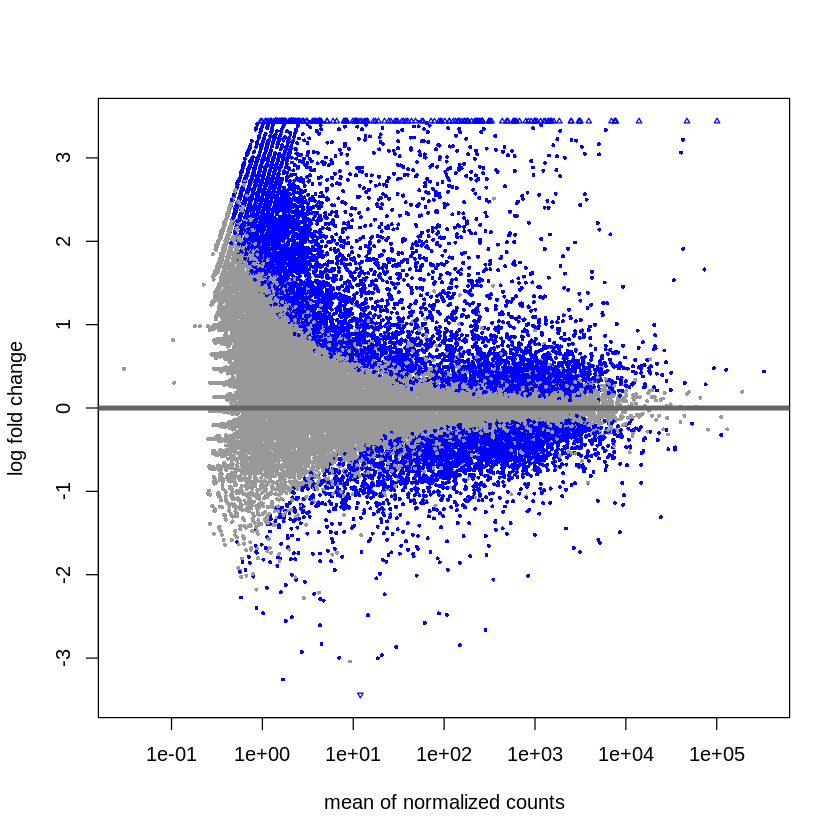

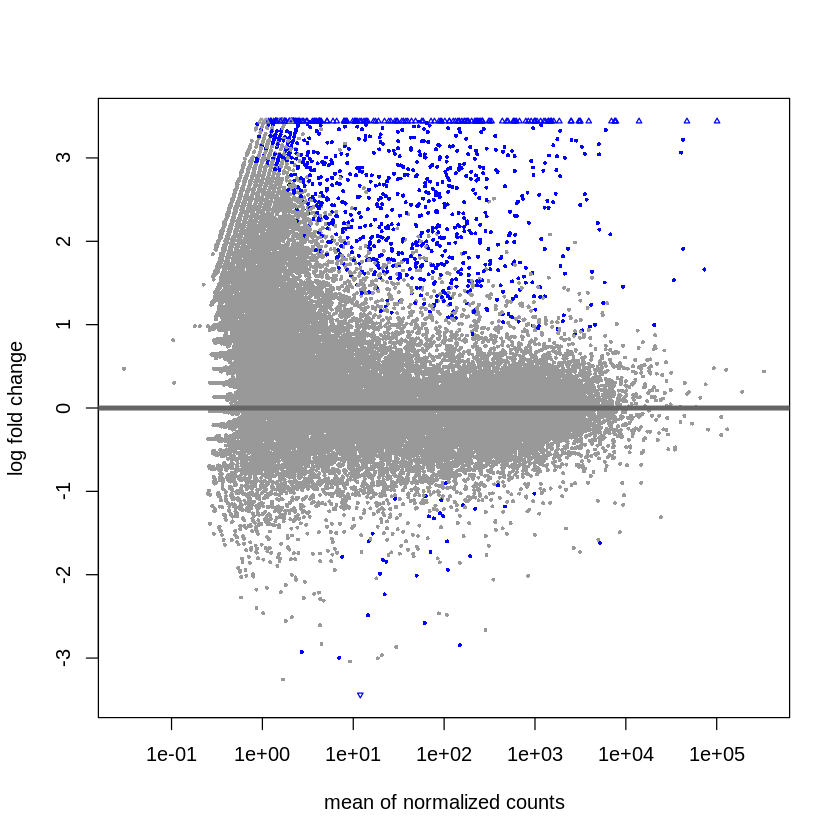

In [ ]:
plotMA(res)
plotMA(res_filt)

In [ ]:
res_filt

log2 fold change (MLE): group COVID19 vs Healthy 
Wald test p-value: group COVID19 vs Healthy 
DataFrame with 37107 rows and 6 columns
                   baseMean log2FoldChange     lfcSE      stat      pvalue
                  <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000227232    4.903704       2.342651  0.620281  3.776757  0.00148804
ENSG00000278267    3.363780      -1.089085  0.385383 -2.825983  0.06320399
ENSG00000233750    0.591105       0.306508  0.767120  0.399556  0.74611929
ENSG00000268903   11.655757       0.762845  0.261644  2.915585  0.15754754
ENSG00000269981    8.992562       0.529600  0.368955  1.435407  0.47065889
...                     ...            ...       ...       ...         ...
ENSG00000277856  586.998684      4.4542520  0.620738  7.175737 9.43644e-11
ENSG00000275063 1504.770646      3.5975685  0.537403  6.694356 4.10825e-09
ENSG00000271254   56.317794     -0.0804585  0.186943 -0.430390 9.88542e-01
ENSG00000275405   11.395651     -0.04969

# **[4] Annotation**
Ensembl ID를 Gene Symbol로 변환

In [ ]:
listEnsembl()
ensembl <- useEnsembl(biomart = "genes")
searchDatasets(mart = ensembl, pattern = "Human")

biomart,version
<chr>,<chr>
genes,Ensembl Genes 113
mouse_strains,Mouse strains 113
snps,Ensembl Variation 113
regulation,Ensembl Regulation 113


Ensembl site unresponsive, trying useast mirror



,dataset,description,version
,<I<chr>>,<I<chr>>,<I<chr>>
80,hsapiens_gene_ensembl,Human genes (GRCh38.p14),GRCh38.p14


In [ ]:
ensembl <- useEnsembl(biomart = 'genes',
                      dataset = 'hsapiens_gene_ensembl')

Ensembl site unresponsive, trying useast mirror



In [ ]:
ensembl_attributes <- listAttributes(ensembl)
head(ensembl_attributes, 20)

,name,description,page
,<chr>,<chr>,<chr>
1,ensembl_gene_id,Gene stable ID,feature_page
2,ensembl_gene_id_version,Gene stable ID version,feature_page
3,ensembl_transcript_id,Transcript stable ID,feature_page
4,ensembl_transcript_id_version,Transcript stable ID version,feature_page
5,ensembl_peptide_id,Protein stable ID,feature_page
6,ensembl_peptide_id_version,Protein stable ID version,feature_page
7,ensembl_exon_id,Exon stable ID,feature_page
8,description,Gene description,feature_page
9,chromosome_name,Chromosome/scaffold name,feature_page


In [ ]:
up_annot <- getBM(attributes= c("ensembl_gene_id", "external_gene_name"),
               filters = "ensembl_gene_id",
               values = rownames(upregulated),
               mart = ensembl)
head(up_annot)

,ensembl_gene_id,external_gene_name
,<chr>,<chr>
1,ENSG00000002079,MYH16
2,ENSG00000003436,TFPI
3,ENSG00000004939,SLC4A1
4,ENSG00000005961,ITGA2B
5,ENSG00000006327,TNFRSF12A
6,ENSG00000007062,PROM1


In [ ]:
down_annot <- getBM(attributes= c("ensembl_gene_id", "external_gene_name"),
               filters = "ensembl_gene_id",
               values = rownames(downregulated),
               mart = ensembl)
head(down_annot)

,ensembl_gene_id,external_gene_name
,<chr>,<chr>
1,ENSG00000101197,BIRC7
2,ENSG00000144290,SLC4A10
3,ENSG00000154736,ADAMTS5
4,ENSG00000163485,ADORA1
5,ENSG00000204388,HSPA1B
6,ENSG00000226321,CROCC2


In [ ]:
write.csv(down_annot$external_gene_name, file = 'down.txt', sep = '\t', row.names = F, col.names = F)
write.csv(up_annot$external_gene_name, file = 'up.txt', sep = '\t', row.names = F, col.names = F)

Warning message in write.csv(down_annot$external_gene_name, file = "down.txt", sep = "\t", :
“attempt to set 'col.names' ignored”
Warning message in write.csv(down_annot$external_gene_name, file = "down.txt", sep = "\t", :
“attempt to set 'sep' ignored”
Warning message in write.csv(up_annot$external_gene_name, file = "up.txt", sep = "\t", :
“attempt to set 'col.names' ignored”
Warning message in write.csv(up_annot$external_gene_name, file = "up.txt", sep = "\t", :
“attempt to set 'sep' ignored”
